In [22]:
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install scikit-surprise

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is 

In [1]:
!pip install scikit-surprise

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [3]:
#Load datasets
ratings_df = pd.read_csv("/content/ratings.csv")   # Columns: user_id, course_id, rating
courses_df = pd.read_csv("/content/courses.csv")   # Columns: Course ID, Course Title

In [4]:
ratings_df.head()

,user_id,course_id,rating
0,231704,IP016,3
1,282032,IP007,5
2,230861,IP017,5
3,152030,IP046,1
4,150885,IP017,5


In [5]:
courses_df.head()

,course_id,course_title
0,IP001,Data Science and AI with IIT Madras
1,IP002,Cloud & DevOps Architect Master’s Program
2,IP003,MBA in Data Science
3,IP004,Advanced Certification in Data Science and AI
4,IP005,Full Stack Web Development Bootcamp


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399566 entries, 0 to 3399565
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    int64 
 1   course_id  object
 2   rating     int64 
dtypes: int64(2), object(1)
memory usage: 77.8+ MB


In [7]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_id     50 non-null     object
 1   course_title  50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes


In [9]:
ratings_df['course_id'].value_counts() # which course is bought the most

,count
course_id,
IP012,172087
IP035,170292
IP002,164778
IP034,164253
IP044,152103
IP008,140813
IP013,132951
IP036,127462
IP026,122881


<Axes: xlabel='count', ylabel='course_id'>

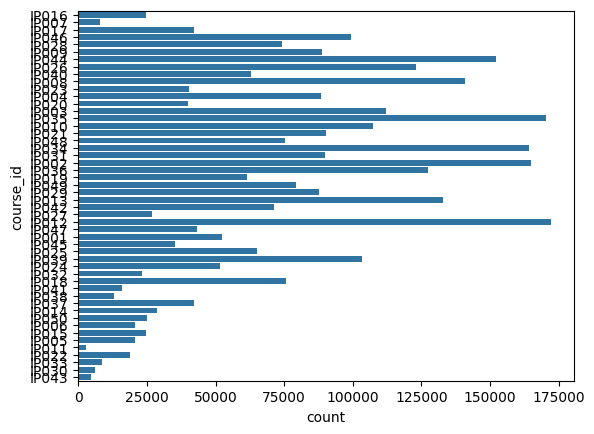

In [10]:
sns.countplot(ratings_df['course_id'])

In [11]:
#Which course is liked the most
ratings_df.groupby('course_id')['rating'].mean().sort_values(ascending=False)

,rating
course_id,
IP004,4.004779
IP005,4.002658
IP001,4.002572
IP003,4.002185
IP008,4.000923
IP010,4.000690
IP007,4.000381
IP006,3.999664
IP002,3.998689


In [12]:
#no of unique customers
ratings_df['user_id'].nunique()

200000

In [13]:
#Each customer has given how many ratings
ratings_df['user_id'].value_counts().head(20)

,count
user_id,
204224,24
291219,24
152057,24
218769,24
211971,24
229542,24
142955,24
123217,24
182393,24


In [14]:
#Which users took data science course
ratings_df[ratings_df['course_id']=='IP006']

,user_id,course_id,rating
209,284944,IP006,3
223,123348,IP006,5
509,168203,IP006,5
792,144447,IP006,4
1304,274984,IP006,5
...,...,...,...
3398931,217874,IP006,4
3399004,156062,IP006,3
3399038,271691,IP006,4
3399391,151270,IP006,5


In [15]:
# Rename for consistency
df = ratings_df.rename(columns={"user_id": "custID", "course_id": "courseID"})

In [16]:
#View info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399566 entries, 0 to 3399565
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   custID    int64 
 1   courseID  object
 2   rating    int64 
dtypes: int64(2), object(1)
memory usage: 77.8+ MB
None


In [17]:
#Filter less active users by setting threshold
cust_activity = df.groupby("custID")["rating"].count()
user_threshold = cust_activity.quantile(0.5)
drop_users = cust_activity[cust_activity < user_threshold].index
df = df[~df["custID"].isin(drop_users)]

In [18]:
#Filter unpopular courses
course_popularity = df.groupby("courseID")["rating"].count()
course_threshold = course_popularity.quantile(0.5)
drop_courses = course_popularity[course_popularity < course_threshold].index
df = df[~df["courseID"].isin(drop_courses)]

In [26]:
#Set course names index
courses_df.rename(columns={"course_id": "courseID", "course_title": "Name"}, inplace=True)


In [28]:
courses_df.set_index("courseID", inplace=True)

In [29]:
#Prepare data for SVD
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["custID", "courseID", "rating"]][:100000], reader)

In [30]:
#Train SVD model
model = SVD()
cross_validate(model, data, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8803  0.8759  0.8778  0.8780  0.0018  
MAE (testset)     0.6952  0.6890  0.6917  0.6920  0.0025  
Fit time          1.92    1.45    1.44    1.60    0.22    
Test time         0.33    0.38    0.37    0.36    0.03    


{'test_rmse': array([0.88027604, 0.87586731, 0.87782606]),
 'test_mae': array([0.69523354, 0.68904994, 0.69168152]),
 'fit_time': (1.917292594909668, 1.4546689987182617, 1.4397380352020264),
 'test_time': (0.3256409168243408, 0.3845975399017334, 0.37262964248657227)}

In [35]:
#Recommend for a specific user
target_user = df["custID"].iloc[0]  # pick any existing user
print(f"\nCourses rated 5 by user {target_user}:\n")
print(df[(df["custID"] == target_user) & (df["rating"] == 5.0)])


Courses rated 5 by user 152030:

        custID courseID  rating
408800  152030    IP034       5
543875  152030    IP035       5


In [40]:
#Courses taken by that particular user
df_target= df[df["custID"] == target_user]
df_target = df_target.merge(courses_df, on="courseID")
df_target[["Name", "rating"]]

,Name,rating
0,Digital Marketing with ChatGPT,1
1,Java Full Stack Developer Course,2
2,Data Science Capstone Project,5
3,Programming in R for Data Science,5
4,Google Cloud Platform (GCP) Training,3
5,Data Analytics Master’s Course,1
6,Machine Learning Certification Training,4
7,Informatica Certification,3
8,Python for Data Science,2
9,Deep Learning with TensorFlow,3


#**As we noticed the user liked Data Science courses more, so we should recommend him more data science related courses**

In [36]:
#Create possible recommendations
recommended_courses = courses_df.copy()
recommended_courses.reset_index(inplace=True)
recommended_courses = recommended_courses[~recommended_courses["courseID"].isin(drop_courses)]

In [37]:
#Estimate scores
recommended_courses["Estimated Score"] = recommended_courses["courseID"].apply(
    lambda x: model.predict(str(target_user), x).est
)

In [38]:
#Sort and display top recommendations
top_recommendations = recommended_courses.sort_values(by="Estimated Score", ascending=False)
print("Top Recommended Courses for User:")
top_recommendations[["courseID", "Name", "Estimated Score"]].head()


Top Recommended Courses for User:


,courseID,Name,Estimated Score
9,IP010,Machine Learning Certification Training,4.000032
8,IP009,AWS Solutions Architect Certification Training,3.996246
3,IP004,Advanced Certification in Data Science and AI,3.988861
2,IP003,MBA in Data Science,3.972059
1,IP002,Cloud & DevOps Architect Master’s Program,3.961658


----------------------------------------------